# INTRODUCTION #

Appending and Merging datasets

In [1]:
#PACKAGES / PYTHON MODULES
import numpy as np
import pandas as pd
import openpyxl
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#SET WORKING DIRECTORY
absolute_path = '/Users/dino/Desktop/2022-Intersession/ECON197'
os.chdir(absolute_path)

print('New working directory is: ', os.getcwd())

New working directory is:  /Users/dino/Desktop/2022-Intersession/ECON197


In [3]:
#GET WORKING DIRECTORY
cwd = os.getcwd()
print('Current Working Directory is: ', cwd)

Current Working Directory is:  /Users/dino/Desktop/2022-Intersession/ECON197


In [4]:
#csv example: PSEI 
psei_1 = pd.read_csv('datasets/finance/PSEI_2002-2012.csv')
psei_2 = pd.read_csv('datasets/finance/PSEI_2012-2022.csv')

#csv example: USDPHP 2012-2022
usdphp_1 = pd.read_csv('datasets/finance/USDPHP_2002-2012.csv')
usdphp_2 = pd.read_csv('datasets/finance/USDPHP_2012-2022.csv')

#Display dataset
usdphp_2
#psei_2

#View whole dataframe
#print(usdphp_1, psei_1)

#print(psei_1.to_string())

,Month_Index,Date,USD/PHP - Close
0,122.0,7/31/12,41.74
1,123.0,8/31/12,42.08
2,124.0,9/28/12,41.72
3,125.0,10/31/12,41.20
4,126.0,11/30/12,40.89
...,...,...,...
116,238.0,3/31/22,51.74
117,239.0,4/29/22,52.20
118,240.0,5/31/22,52.39
119,241.0,6/30/22,54.98


In [5]:
dollar_stocks1 = usdphp_1.set_index('Month_Index').join(psei_1.set_index('Month_Index'),lsuffix='_USD',rsuffix='_PSEI')
dollar_stocks2 = usdphp_2.set_index('Month_Index').join(psei_2.set_index('Month_Index'),lsuffix='_USD',rsuffix='_PSEI')

#print(dollar_stocks1.to_string())


In [6]:
#print(dollar_stocks2.to_string())

In [7]:
combined_data = pd.concat([dollar_stocks1,dollar_stocks2])

#Remove rows with empty cells
combined_data = combined_data.dropna(axis=0)

combined_data

,Date_USD,USD/PHP - Close,Date_PSEI,Philippines PSE PSEi - Close
Month_Index,,,,
1.0,6/28/02,50.32,6/28/02,1156.35
2.0,7/31/02,51.27,7/31/02,1123.24
3.0,8/30/02,51.84,8/30/02,1103.36
4.0,9/30/02,52.43,9/30/02,1129.34
5.0,10/31/02,53.13,10/30/02,1048.53
...,...,...,...,...
237.0,2/28/22,51.27,2/28/22,7311.01
238.0,3/31/22,51.74,3/31/22,7203.47
239.0,4/29/22,52.20,4/29/22,6731.25


In [8]:
combined_data.index

Float64Index([  1.0,   2.0,   3.0,   4.0,   5.0,   6.0,   7.0,   8.0,   9.0,
               10.0,
              ...
              232.0, 233.0, 234.0, 235.0, 236.0, 237.0, 238.0, 239.0, 240.0,
              241.0],
             dtype='float64', name='Month_Index', length=241)

## EXERCISE ##

(1) Rename the index in combined_data to a label representing month, year from the Data_USD and Date_PSEI columns.
\
(2) Drop the extra date columns.

In [9]:
combined_data

,Date_USD,USD/PHP - Close,Date_PSEI,Philippines PSE PSEi - Close
Month_Index,,,,
1.0,6/28/02,50.32,6/28/02,1156.35
2.0,7/31/02,51.27,7/31/02,1123.24
3.0,8/30/02,51.84,8/30/02,1103.36
4.0,9/30/02,52.43,9/30/02,1129.34
5.0,10/31/02,53.13,10/30/02,1048.53
...,...,...,...,...
237.0,2/28/22,51.27,2/28/22,7311.01
238.0,3/31/22,51.74,3/31/22,7203.47
239.0,4/29/22,52.20,4/29/22,6731.25


In [10]:
combined_data['parsed_dates'] = pd.to_datetime(combined_data['Date_USD'], \
                                               format="%m/%d/%y")

combined_data

,Date_USD,USD/PHP - Close,Date_PSEI,Philippines PSE PSEi - Close,parsed_dates
Month_Index,,,,,
1.0,6/28/02,50.32,6/28/02,1156.35,2002-06-28
2.0,7/31/02,51.27,7/31/02,1123.24,2002-07-31
3.0,8/30/02,51.84,8/30/02,1103.36,2002-08-30
4.0,9/30/02,52.43,9/30/02,1129.34,2002-09-30
5.0,10/31/02,53.13,10/30/02,1048.53,2002-10-31
...,...,...,...,...,...
237.0,2/28/22,51.27,2/28/22,7311.01,2022-02-28
238.0,3/31/22,51.74,3/31/22,7203.47,2022-03-31
239.0,4/29/22,52.20,4/29/22,6731.25,2022-04-29


In [11]:
combined_data['Month'] = combined_data['parsed_dates'].dt.month
combined_data['Year'] = combined_data['parsed_dates'].dt.year


combined_data['YearMonth_Index'] = 100*combined_data['Year'] + combined_data['Month']

combined_data2 = combined_data.set_index('YearMonth_Index')

combined_data2

,Date_USD,USD/PHP - Close,Date_PSEI,Philippines PSE PSEi - Close,parsed_dates,Month,Year
YearMonth_Index,,,,,,,
200206,6/28/02,50.32,6/28/02,1156.35,2002-06-28,6,2002
200207,7/31/02,51.27,7/31/02,1123.24,2002-07-31,7,2002
200208,8/30/02,51.84,8/30/02,1103.36,2002-08-30,8,2002
200209,9/30/02,52.43,9/30/02,1129.34,2002-09-30,9,2002
200210,10/31/02,53.13,10/30/02,1048.53,2002-10-31,10,2002
...,...,...,...,...,...,...,...
202202,2/28/22,51.27,2/28/22,7311.01,2022-02-28,2,2022
202203,3/31/22,51.74,3/31/22,7203.47,2022-03-31,3,2022
202204,4/29/22,52.20,4/29/22,6731.25,2022-04-29,4,2022


In [12]:
columns_to_drop = ['Date_USD','Date_PSEI','parsed_dates','Month','Year']

combined_data2 = combined_data2.drop(columns_to_drop, axis=1,inplace=False)

combined_data2

,USD/PHP - Close,Philippines PSE PSEi - Close
YearMonth_Index,,
200206,50.32,1156.35
200207,51.27,1123.24
200208,51.84,1103.36
200209,52.43,1129.34
200210,53.13,1048.53
...,...,...
202202,51.27,7311.01
202203,51.74,7203.47
202204,52.20,6731.25


In [13]:
combined_data.index.dtype

dtype('float64')

<AxesSubplot:xlabel='YearMonth_Index'>

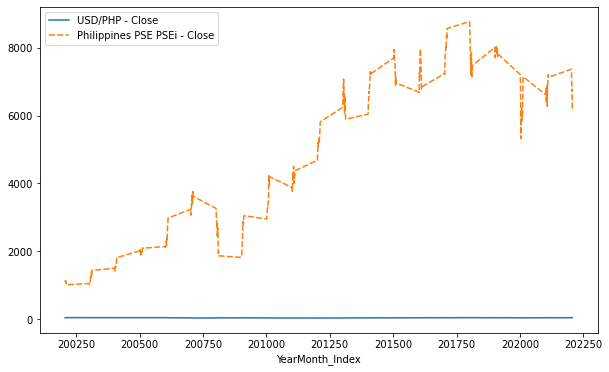

In [14]:
plt.figure(figsize=(10,6))

sns.lineplot(data=combined_data2)

In [15]:
np.log?

Call signature:  np.log(*args, **kwargs)
Type:            ufunc
String form:     <ufunc 'log'>
File:            ~/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/numpy/__init__.py
Docstring:      
log(x, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

Natural logarithm, element-wise.

The natural logarithm `log` is the inverse of the exponential function,
so that `log(exp(x)) = x`. The natural logarithm is logarithm in base
`e`.

Parameters
----------
x : array_like
    Input value.
out : ndarray, None, or tuple of ndarray and None, optional
    A location into which the result is stored. If provided, it must have
    a shape that the inputs broadcast to. If not provided or None,
    a freshly-allocated array is returned. A tuple (possible only as a
    keyword argument) must have length equal to the number of outputs.
where : array_like, optional
    This condition is broadcast over the input. At locations wh

In [17]:
combined_data2

,USD/PHP - Close,Philippines PSE PSEi - Close
YearMonth_Index,,
200206,50.32,1156.35
200207,51.27,1123.24
200208,51.84,1103.36
200209,52.43,1129.34
200210,53.13,1048.53
...,...,...
202202,51.27,7311.01
202203,51.74,7203.47
202204,52.20,6731.25


In [18]:
B = np.log(combined_data2['Philippines PSE PSEi - Close'])

In [19]:
B

YearMonth_Index
200206    7.053024
200207    7.023973
200208    7.006115
200209    7.029389
200210    6.955144
            ...   
202202    8.897137
202203    8.882318
202204    8.814516
202205    8.820947
202206    8.725090
Name: Philippines PSE PSEi - Close, Length: 241, dtype: float64

In [20]:
combined_data2

,USD/PHP - Close,Philippines PSE PSEi - Close
YearMonth_Index,,
200206,50.32,1156.35
200207,51.27,1123.24
200208,51.84,1103.36
200209,52.43,1129.34
200210,53.13,1048.53
...,...,...
202202,51.27,7311.01
202203,51.74,7203.47
202204,52.20,6731.25


In [23]:
combined_data2['B'] = B

In [24]:
combined_data2

,USD/PHP - Close,Philippines PSE PSEi - Close,B
YearMonth_Index,,,
200206,50.32,1156.35,7.053024
200207,51.27,1123.24,7.023973
200208,51.84,1103.36,7.006115
200209,52.43,1129.34,7.029389
200210,53.13,1048.53,6.955144
...,...,...,...
202202,51.27,7311.01,8.897137
202203,51.74,7203.47,8.882318
202204,52.20,6731.25,8.814516
